In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv')

### Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [10]:
movies_df.columns

Index(['Unnamed: 0', 'budget', 'homepage', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'genre_id'],
      dtype='object')

In [14]:
mostpop_df = movies_df[movies_df['vote_count'] > movies_df['vote_count'].quantile(q=0.75)]
mostpop_df.sort_values(by=['vote_average'], ascending=False).head(10)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a <del>średnie przychody</del> <b>średnie budżety</b> wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [86]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
recent_df = movies_df[(movies_df['release_date'] >= '2010-01-01') & (movies_df['release_date'] <= '2016-12-31')]

budgets = recent_df.groupby(pd.Grouper(key='release_date',
                                       freq='A')).agg({'budget': 'mean','revenue': 'mean'}).reset_index()
budgets

,release_date,budget,revenue
0,2010-12-31,3.449541e+07,9.043811e+07
1,2011-12-31,3.477232e+07,9.200413e+07
2,2012-12-31,3.492203e+07,1.160659e+08
3,2013-12-31,3.552329e+07,1.013485e+08
4,2014-12-31,3.095989e+07,1.013466e+08
5,2015-12-31,3.113216e+07,1.054399e+08
6,2016-12-31,4.570327e+07,1.390496e+08


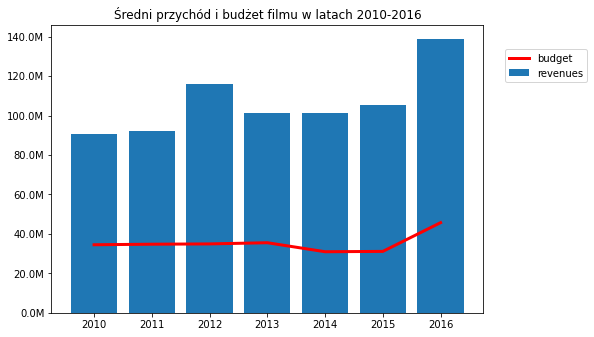

In [85]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)


years = [yr for yr in range(2010, 2017)]

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(years, budgets['budget'] , color='red', linewidth='3', label='budget')
axes.bar(years, budgets['revenue'], label='revenues')

formatter = plt.FuncFormatter(million)

axes.yaxis.set_major_formatter(formatter)

axes.set_title('Średni przychód i budżet filmu w latach 2010-2016')
axes.legend(loc=(1.05, 0.8))

In [98]:
genres_df.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


### Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [101]:
movgen_df = movies_df.merge(genres_df, left_on='genre_id', right_on='Unnamed: 0')
movgen_df.head()

,Unnamed: 0_x,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,Unnamed: 0_y,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,28.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,28.0,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,28.0,Action
3,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,28.0,Action
4,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,28.0,Action


In [108]:
movgen_df.groupby('genres').agg({'title': 'count'}).sort_values(by='title', ascending=False).head()

,title
genres,
Drama,1207
Comedy,1042
Action,754
Adventure,339
Horror,300


In [109]:
movgen_df.groupby('genres').agg({'runtime': 'mean'}).sort_values(by='runtime', ascending=False).head()

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947


<AxesSubplot:ylabel='Frequency'>

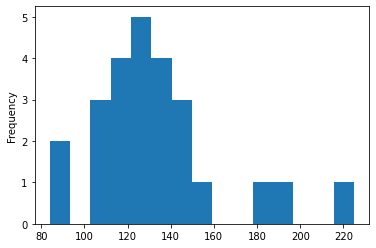

In [123]:
history = movgen_df[movgen_df['genres'] == 'History']
history['runtime'].plot(kind='hist',bins=15)

## Odpowiedzi<br>
<b>Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?</b><br>
Najczęściej na liście pojawia się gatunek Drama: 1207 wystąpień<br>
<b>Filmy, którego gatunku trwają średnio najdłużej (runtime)?</b><br>
Przeciętnie najdłużej trwają filmy gatunku "History" ze średnią 134 minuty<br>